## Libraries

In [240]:
#---------------------------------------------------------------------------
# importing libraries
#---------------------------------------------------------------------------

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import missingno as msno

from sklearn.impute import SimpleImputer

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import PrecisionRecallCurve


## Functions

In [65]:
#Confusion Matrix Plot
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    #classes = classes
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [290]:
# Training and fitting the model with DecisionTree + Generating

#colors https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
#Yellow Brick = https://www.scikit-yb.org/en/latest/api/classifier/index.html

def get_classificationReportDecisionTree(x_train, x_test, y_train, y_test, classes):
    
    #spliting the data of training (70%) and test (30%) ---- moved to the main function - get_ComparisonDecisionTree
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

    #Creating the model
    model=tree.tree.DecisionTreeClassifier()
    model.fit(x_train, y_train)

    #Getting the predictions from the trained model
    y_pred = model.predict(x_test)

    #Showing the Classification Report (Text)
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    
    #Showing the Classification Report (Chart)
    visualizer = ClassificationReport(model, classes=classes, cmap='RdBu', support=True)
    visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
    visualizer.score(x_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()                 # Draw/show/poof the data    
    
    # The ConfusionMatrix visualizer taxes a model
    print('--------------------------------------------------------------------------------')     
    print('Confusion Matrix')
    #cm = ConfusionMatrix(model, classes=classes, label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    cm = ConfusionMatrix(model, classes=classes, cmap='RdBu')
    cm.fit(x_train, y_train)  # Fit the visualizer and the model
    cm.score(x_test, y_test)  # Evaluate the model on the test data
    cm.poof()
    
    # The Class Prediction Error Distribution
    print('--------------------------------------------------------------------------------')     
    print('Class Prediction Error Distribution')
    cp = ClassPredictionError(model, classes=classes)
    cp.fit(x_train, y_train)  # Fit the visualizer and the model
    cp.score(x_test, y_test)  # Evaluate the model on the test data
    cp.poof()

    # Precision-Recall Curves
    print('--------------------------------------------------------------------------------')     
    print('Precision-Recall Curves')
    if (classes.size > 2):
        print('(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)')
    pc = PrecisionRecallCurve(model, classes=classes)
    pc.fit(x_train, y_train)  # Fit the visualizer and the model
    pc.score(x_test, y_test)  # Evaluate the model on the test data
    pc.poof()    

    # Precision-Recall Curves Multi-Label Classification  
    if (classes.size > 2):
        print('--------------------------------------------------------------------------------')     
        print('Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)')
        pc = PrecisionRecallCurve(model, per_class=True, iso_f1_curves=True, fill_area=False, micro=False)
        pc.fit(x_train, y_train)  # Fit the visualizer and the model
        pc.score(x_test, y_test)  # Evaluate the model on the test data
        pc.poof()     
    
    #Showing the confusion matrix (Chart) ***Alternative to YellowBrick code above
    #print('--------------------------------------------------------------------------------')  
    #plot_confusion_matrix(y_test, y_pred, title='Confusion matrix, without normalization:')
    #print(' ')
    #plot_confusion_matrix(y_test, y_pred, normalize=True, title='Normalized confusion matrix:')
    
    return 

In [286]:
#Running the comparison
def get_ComparisonDecisionTree(dataset):

        
    # Changes
    # 3 confirm if the y label is string, in case yes, then change to numbers 
    # 4 create the baseline execution - for that validate if there is missing data then remove it prior to run.
    
    #---------------------------------------------------------------------------
    # variables
    # removed from parameters of the function is_missing + X_full + y_full
    #---------------------------------------------------------------------------
  
    is_missing = dataset.isnull().values.any()
    X_full = np.array(dataset.iloc[:,:-1])
    y_full = np.array(dataset.iloc[:,-1])  
    
    #review after the latest code changes!
    y = pd.DataFrame(y_full)
    classes = y[0].unique()
    
    
    # The Baseline are running with a different split of train and test data!
    # Check if the original dataset has missing values
    if (is_missing==False):
        
        #---------------------------------------------------------------------------
        # Baseline
        # In case of the original dataset without missing (e.g., iris) then use it as is.
        #---------------------------------------------------------------------------
        x_trainB, x_testB, y_trainB, y_testB = train_test_split(X_full, y_full, test_size=0.30)
        x_train0 = pd.DataFrame(x_trainB)
        x_test0 = pd.DataFrame(x_testB)          
        print(' ')    
        print('================================================================================')
        print('================================================================================')
        print('Classification Results for Baseline')  
        print('================================================================================')
        print('================================================================================')
        print(' ') 
        #print('Sample of training records:')
        #print(x_train0.head())
        #print(' ')
        print('--------------------------------------------------------------------------------')
        get_classificationReportDecisionTree(x_train0, x_test0, y_trainB, y_testB, classes)                 
        
        #---------------------------------------------------------------------------
        # Add missing values in 75% of the lines randomly 
        #---------------------------------------------------------------------------        
        n_samples = X_full.shape[0]
        n_features = X_full.shape[1]
        rng = np.random.RandomState(0)      
        missing_rate = 0.75
        
        n_missing_samples = int(np.floor(n_samples * missing_rate))
        missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples, dtype=np.bool),
                                         np.ones(n_missing_samples,dtype=np.bool)))
        rng.shuffle(missing_samples)
        missing_features = rng.randint(0, n_features, n_missing_samples)
        X_missing = X_full.copy()
        X_missing[np.where(missing_samples)[0], missing_features] = np.nan    
    
    else:        

        #---------------------------------------------------------------------------
        # Baseline
        # If originall missing data then clean all this lines and run baseline
        #---------------------------------------------------------------------------        
        df_clean = dataset.dropna()
        X_baseline = np.array(df_clean.iloc[:,:-1])
        y_baseline = np.array(df_clean.iloc[:,-1])  
        x_trainB, x_testB, y_trainB, y_testB = train_test_split(X_baseline, y_baseline, test_size=0.30)
        #acho que nao precisa mais disso - pode passar direto!
        x_train0 = pd.DataFrame(x_trainB)
        x_test0 = pd.DataFrame(x_testB)  
        print(' ')    
        print('================================================================================')       
        print('================================================================================')
        print('Classification Results for Baseline')   
        print('================================================================================')
        print('================================================================================')       
        print(' ') 
        #print('Sample of training records:')
        #print(x_train0.head())
        #print(' ')
        print('--------------------------------------------------------------------------------')
        get_classificationReportDecisionTree(x_train0, x_test0, y_trainB, y_testB, classes)
                
        #All the other tests will continue with the same variable name
        X_missing = X_full.copy()
                
    #No Changes to the class/label column   
    y_missing = y_full.copy()
    
    
    #---------------------------------------------------------------------------  
    # Spliting the data of training (70%) and test (30%)
    # Same set of data for all preprocessing comparisons! =)
    #---------------------------------------------------------------------------    
    x_train, x_test, y_train, y_test = train_test_split(X_missing, y_missing, test_size=0.30)
       
        
    #---------------------------------------------------------------------------
    # Generating the missing values matrix prior to the imputation strategies
    #---------------------------------------------------------------------------    
    df = pd.DataFrame(X_missing)  # Rever!! poderia chamar direto "dataset"?? so no caso iris
    #msno.matrix(df)  #Gera bug com o gerenciamento do ax dos graficos se colocado no inicio.
    print(' ') 
    print(' ')    
    print('================================================================================')    
    print('================================================================================')
    print('Classification Results with Missing Values')  
    print('================================================================================')
    print('================================================================================')    
    print(' ')    
    #print('Sample of records for the dataset with missing values:')
    #print(df.head())


    #---------------------------------------------------------------------------
    # replacing missing values by 0
    # If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.
    #---------------------------------------------------------------------------
    imp1 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    x_train1 = pd.DataFrame(imp1.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test1 = pd.DataFrame(imp1.fit_transform(x_test))  
    print(' ')    
    print('================================================================================')
    print('Stategy 1 - Constant Imputation (=zero)')   
    print('================================================================================')
    print(' ') 
    #print('Sample of training records:')
    #print(x_train1.head())
    #print(' ')
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train1, x_test1, y_train, y_test, classes)


    #---------------------------------------------------------------------------
    # Imputation (mean strategy) of the missing values
    # If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
    #---------------------------------------------------------------------------
    imp2 = SimpleImputer(missing_values=np.nan, strategy="mean")
    x_train2 = pd.DataFrame(imp2.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test2 = pd.DataFrame(imp2.fit_transform(x_test))    
    print(' ')   
    print('================================================================================')
    print('Stategy 2 - Mean Imputation')      
    print('================================================================================')
    print(' ') 
    #print('Sample of training records:')
    #print(x_train2.head())
    #print(' ')       
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train2, x_test2, y_train, y_test, classes)


    #---------------------------------------------------------------------------
    # Estimate the score after imputation (median strategy) of the missing values
    # If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
    #---------------------------------------------------------------------------
    imp3 = SimpleImputer(missing_values=np.nan, strategy="median")
    x_train3 = pd.DataFrame(imp3.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test3 = pd.DataFrame(imp3.fit_transform(x_test))     
    print(' ')    
    print('================================================================================')
    print('Strategy 3 - Median Imputation')        
    print('================================================================================')
    print(' ')       
    #print('Sample of training records:')
    #print(x_train3.head())
    #print(' ')       
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train3, x_test3, y_train, y_test, classes)


    #---------------------------------------------------------------------------
    # Estimate the score after imputation (most_frequent strategy) of the missing values
    # If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.
    #---------------------------------------------------------------------------
    imp4 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    x_train4 = pd.DataFrame(imp4.fit_transform(x_train)) # Rever!! pq transforma pandas?
    x_test4 = pd.DataFrame(imp4.fit_transform(x_test))    
    print(' ')    
    print('================================================================================')
    print('Strategy 4 - Most Frequent Imputation')          
    print('================================================================================')
    print(' ')   
    #print('Sample of training records:')
    #print(x_train4.head())
    #print(' ')       
    print('--------------------------------------------------------------------------------')
    get_classificationReportDecisionTree(x_train4, x_test4, y_train, y_test, classes)

    print(' ') 
    print(' ')    
    print('================================================================================')
    print('Matrix visualization of the nullity of the given dataset') 
    if is_missing==False:
        print('(Missing values were added randomly in 75% of the lines)')  
    print('================================================================================')
    msno.matrix(df)

    return 

## Loading Dataset - Multi-Label Classification (Iris)

Getting the original dataset and adding randomly the missing data for evaluation

 
Classification Results for Baseline
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



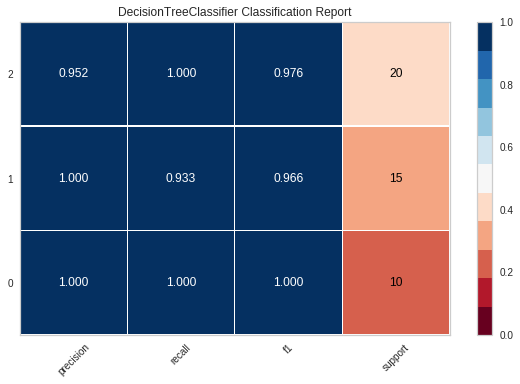

--------------------------------------------------------------------------------
Confusion Matrix


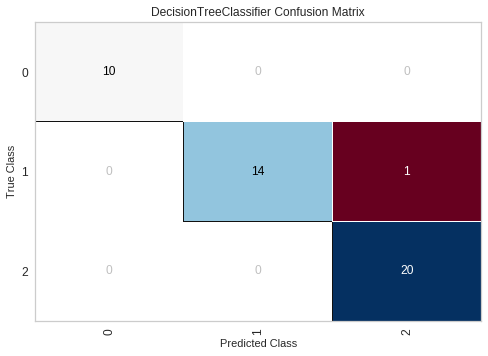

--------------------------------------------------------------------------------
Class Prediction Error Distribution


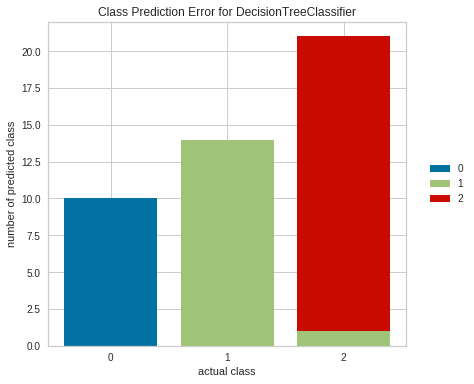

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


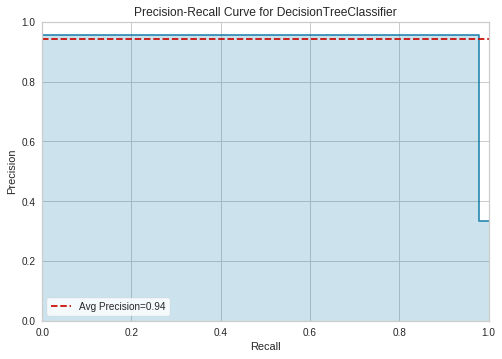

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


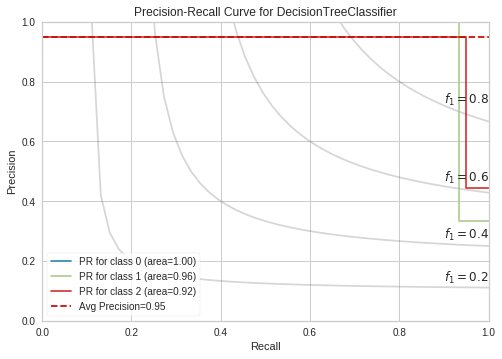

 
 
Classification Results with Missing Values
 
 
Stategy 1 - Constant Imputation (=zero)
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



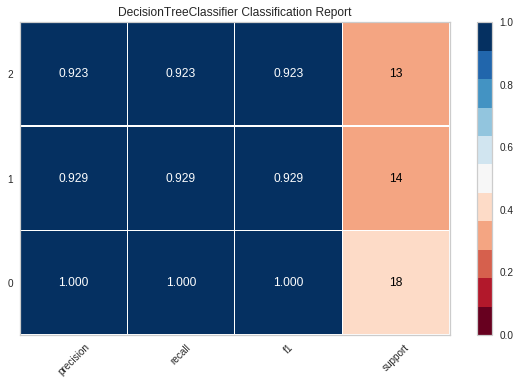

--------------------------------------------------------------------------------
Confusion Matrix


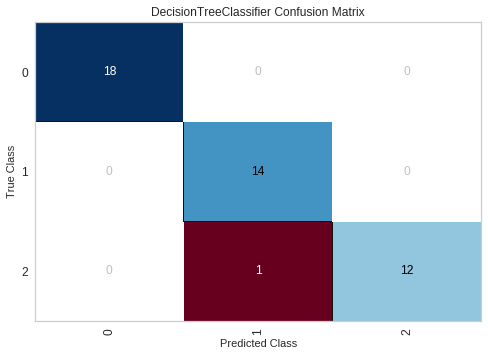

--------------------------------------------------------------------------------
Class Prediction Error Distribution


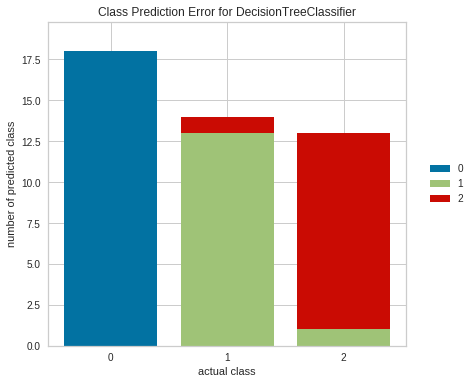

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


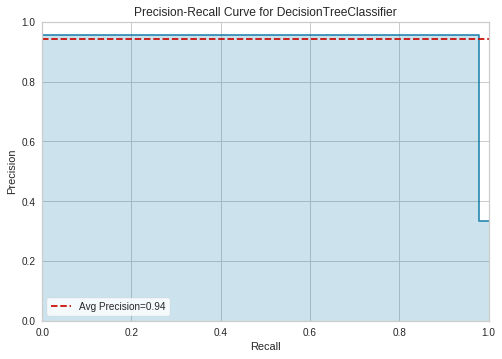

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


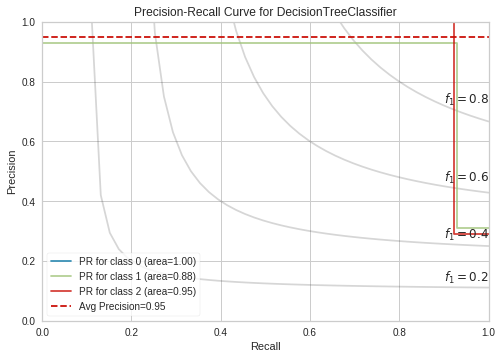

 
Stategy 2 - Mean Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      1.00      0.93        14
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



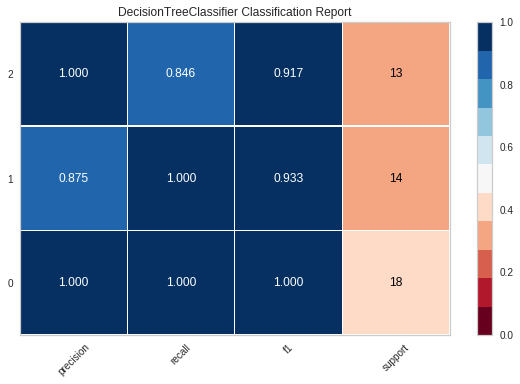

--------------------------------------------------------------------------------
Confusion Matrix


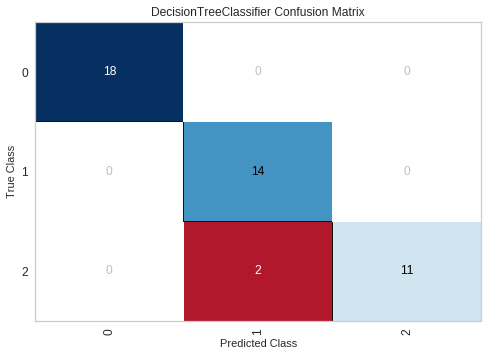

--------------------------------------------------------------------------------
Class Prediction Error Distribution


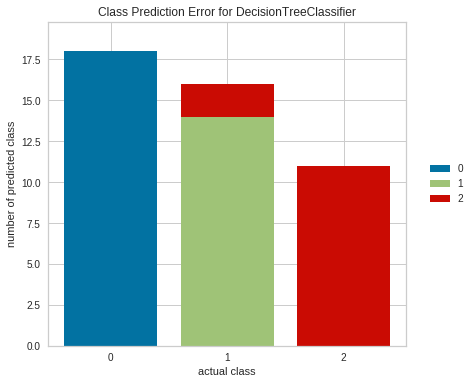

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


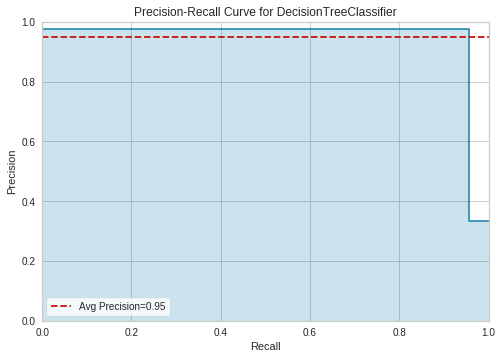

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


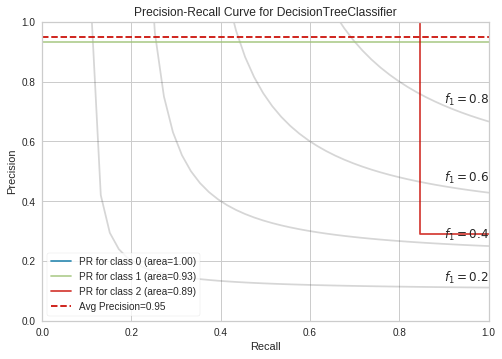

 
Strategy 3 - Median Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



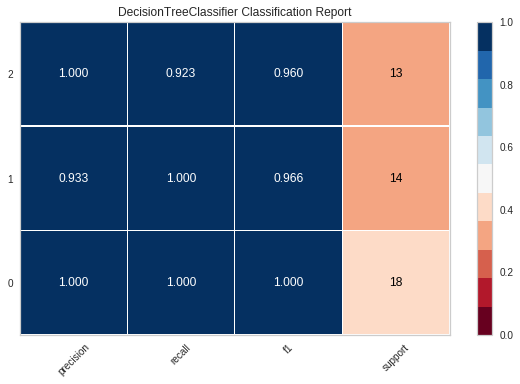

--------------------------------------------------------------------------------
Confusion Matrix


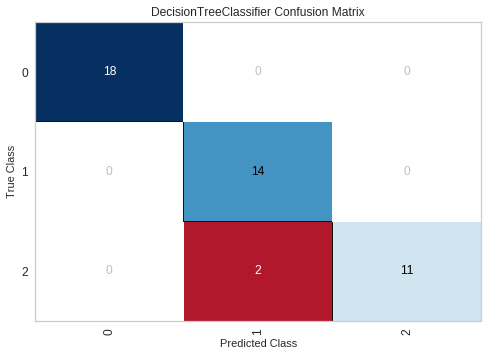

--------------------------------------------------------------------------------
Class Prediction Error Distribution


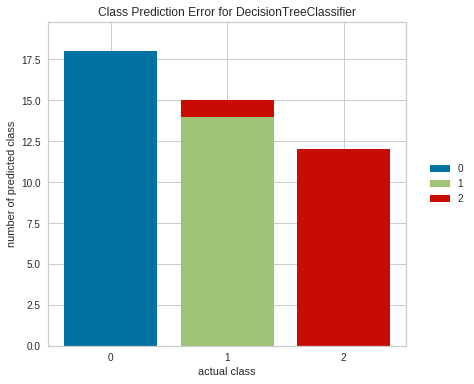

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


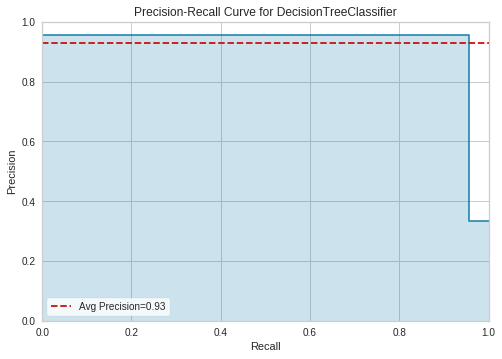

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


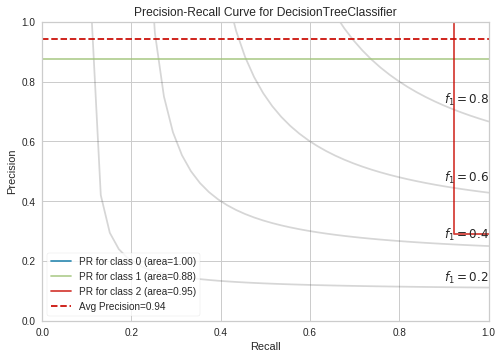

 
Strategy 4 - Most Frequent Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.87      0.93      0.90        14
           2       0.92      0.85      0.88        13

    accuracy                           0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



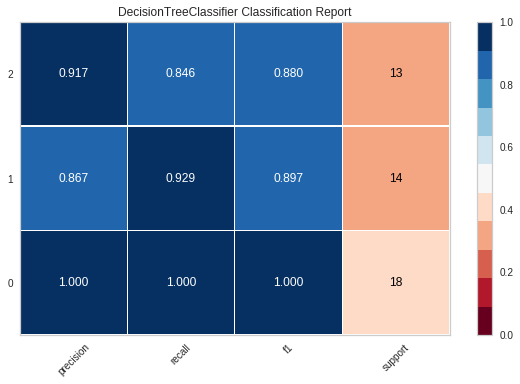

--------------------------------------------------------------------------------
Confusion Matrix


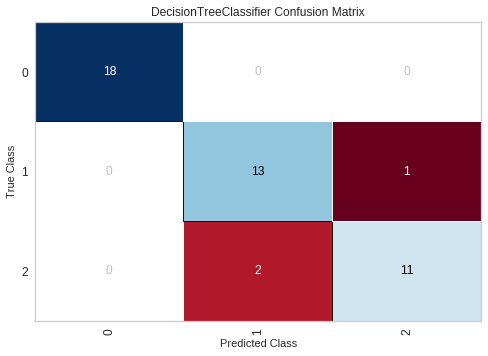

--------------------------------------------------------------------------------
Class Prediction Error Distribution


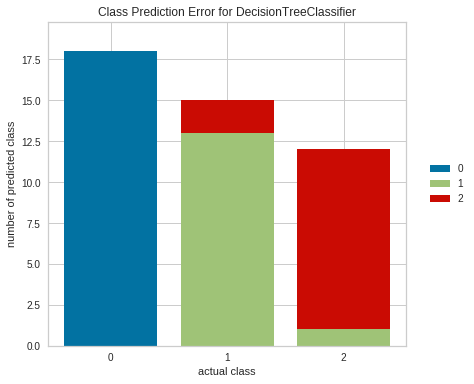

--------------------------------------------------------------------------------
Precision-Recall Curves
(To support multi-label classification, the estimator is wrapped in a OneVsRestClassifier to produce binary comparisons for each class. The Precision-Recall curve is then computed as the micro-average of the precision and recall for all classes)


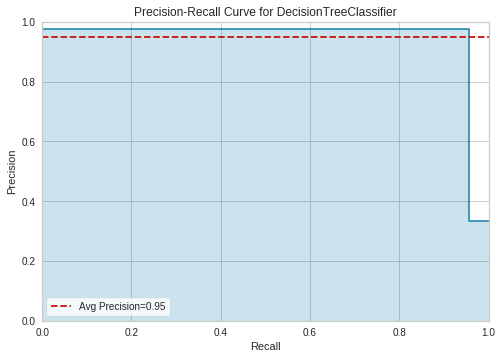

--------------------------------------------------------------------------------
Precision-Recall Curves (displaying the each curve individually, along with F1-score ISO curves)


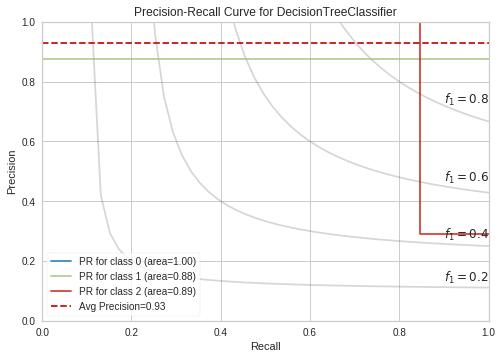

 
 
Matrix visualization of the nullity of the given dataset
(Missing values were added randomly in 75% of the lines)


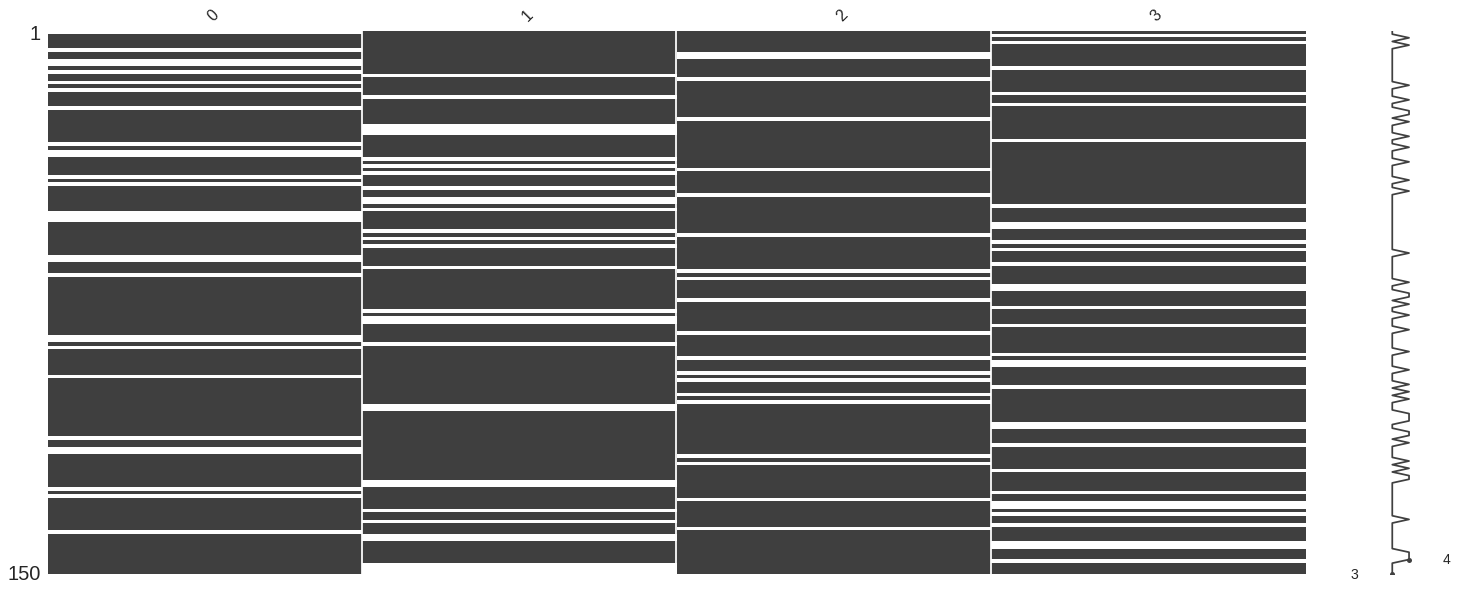

In [289]:
#---------------------------------------------------------------------------
# loading dataset Iris
#---------------------------------------------------------------------------

iris = pd.read_csv("/home/owner/workspace/datasets/iris.csv", encoding='UTF-8')

# Change categorical data to number 0-2
iris["species"] = pd.Categorical(iris["species"])
iris["species"] = iris["species"].cat.codes

#X_full = np.array(iris.iloc[:,:-1])
#y_full = np.array(iris.iloc[:,-1])  

#print(iris.isnull().values.any())

#---------------------------------------------------------------------------
# Calling the Comparison Function based on the selected database 
#---------------------------------------------------------------------------
#get_ComparisonDecisionTree(False, X_full, y_full)

get_ComparisonDecisionTree(iris)

## Loading Dataset - Binary Classification (Mammographic)

Original Values, no data manipulation prior to this step

 
Classification Results for Baseline
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       135
           1       0.75      0.73      0.74       114

    accuracy                           0.77       249
   macro avg       0.77      0.76      0.76       249
weighted avg       0.77      0.77      0.77       249



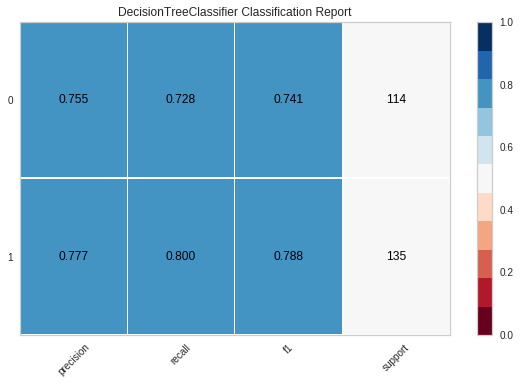

--------------------------------------------------------------------------------
Confusion Matrix


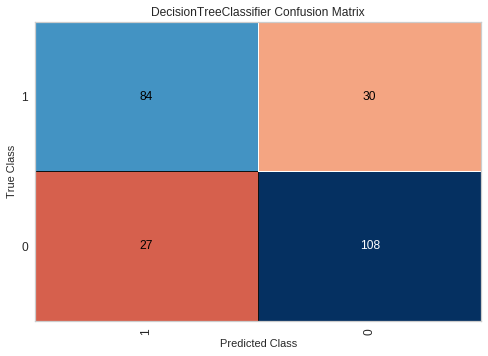

--------------------------------------------------------------------------------
Class Prediction Error Distribution


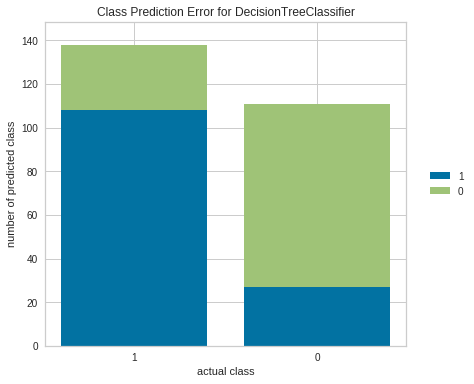

--------------------------------------------------------------------------------
Precision-Recall Curves


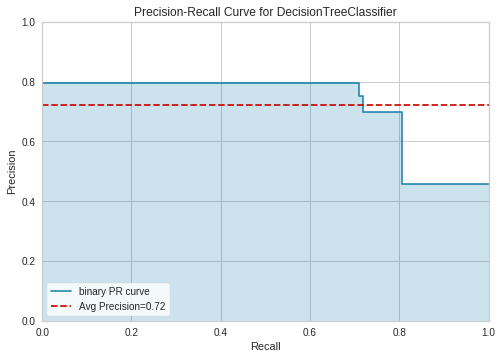

 
 
Classification Results with Missing Values
 
 
Stategy 1 - Constant Imputation (=zero)
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       152
           1       0.79      0.77      0.78       137

    accuracy                           0.79       289
   macro avg       0.79      0.79      0.79       289
weighted avg       0.79      0.79      0.79       289



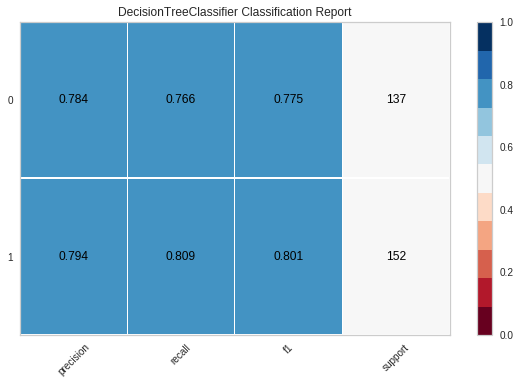

--------------------------------------------------------------------------------
Confusion Matrix


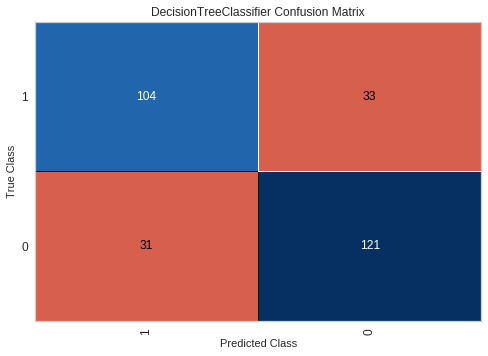

--------------------------------------------------------------------------------
Class Prediction Error Distribution


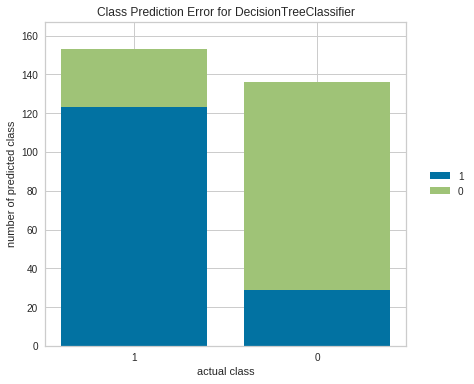

--------------------------------------------------------------------------------
Precision-Recall Curves


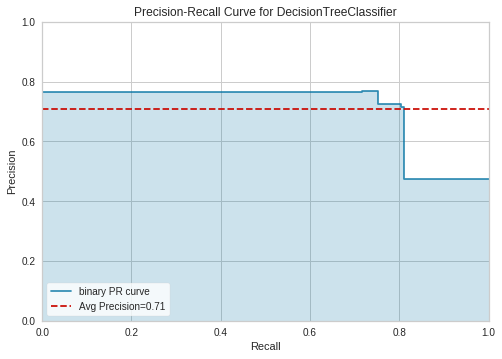

 
Stategy 2 - Mean Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       152
           1       0.76      0.72      0.74       137

    accuracy                           0.76       289
   macro avg       0.76      0.76      0.76       289
weighted avg       0.76      0.76      0.76       289



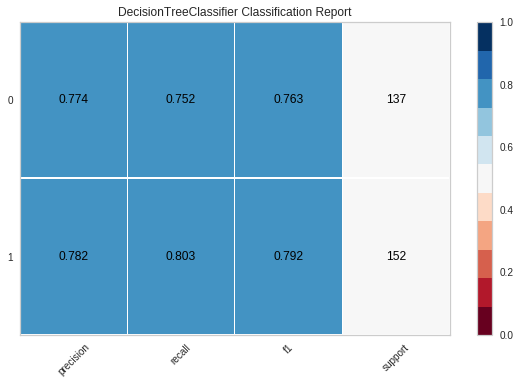

--------------------------------------------------------------------------------
Confusion Matrix


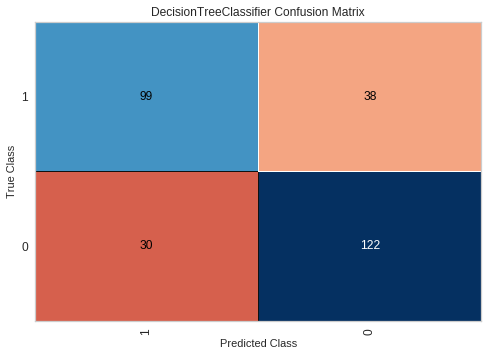

--------------------------------------------------------------------------------
Class Prediction Error Distribution


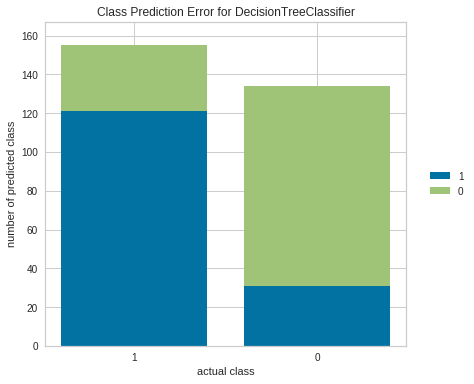

--------------------------------------------------------------------------------
Precision-Recall Curves


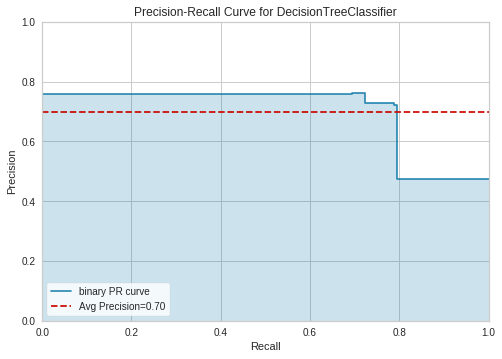

 
Strategy 3 - Median Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       152
           1       0.77      0.77      0.77       137

    accuracy                           0.79       289
   macro avg       0.78      0.78      0.78       289
weighted avg       0.79      0.79      0.79       289



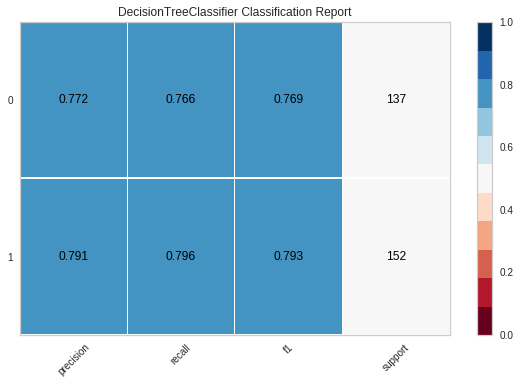

--------------------------------------------------------------------------------
Confusion Matrix


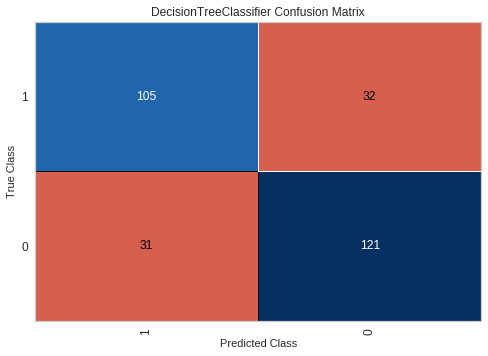

--------------------------------------------------------------------------------
Class Prediction Error Distribution


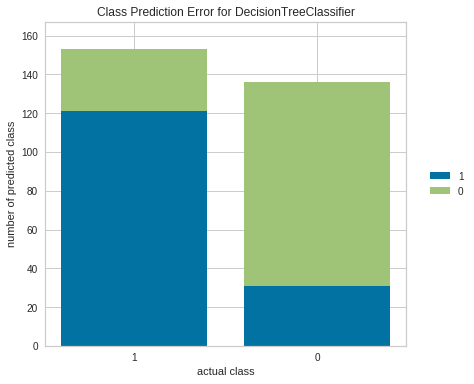

--------------------------------------------------------------------------------
Precision-Recall Curves


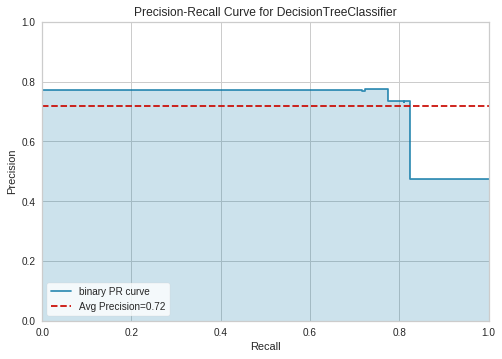

 
Strategy 4 - Most Frequent Imputation
 
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       152
           1       0.80      0.72      0.76       137

    accuracy                           0.78       289
   macro avg       0.78      0.78      0.78       289
weighted avg       0.78      0.78      0.78       289



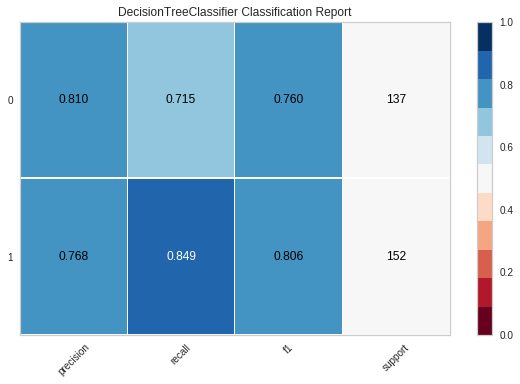

--------------------------------------------------------------------------------
Confusion Matrix


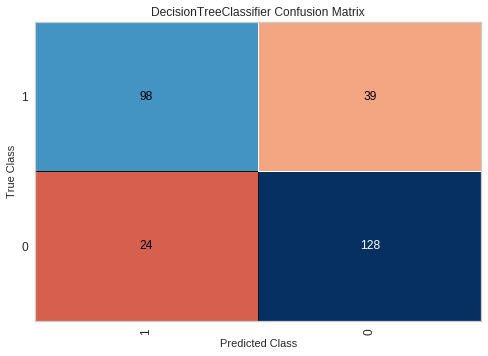

--------------------------------------------------------------------------------
Class Prediction Error Distribution


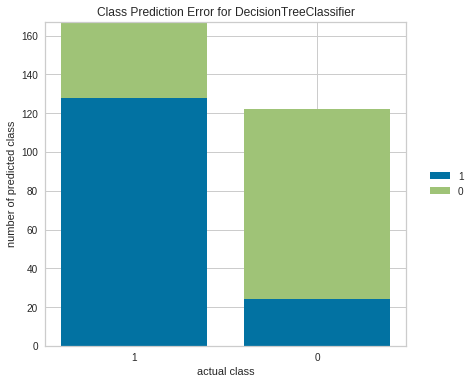

--------------------------------------------------------------------------------
Precision-Recall Curves


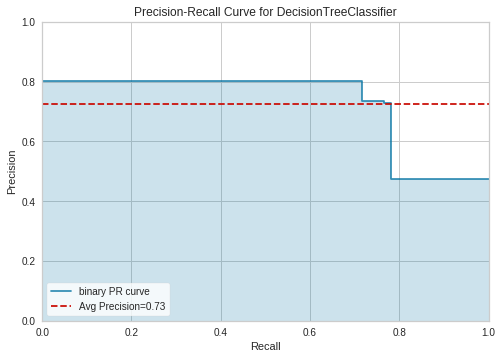

 
 
Matrix visualization of the nullity of the given dataset


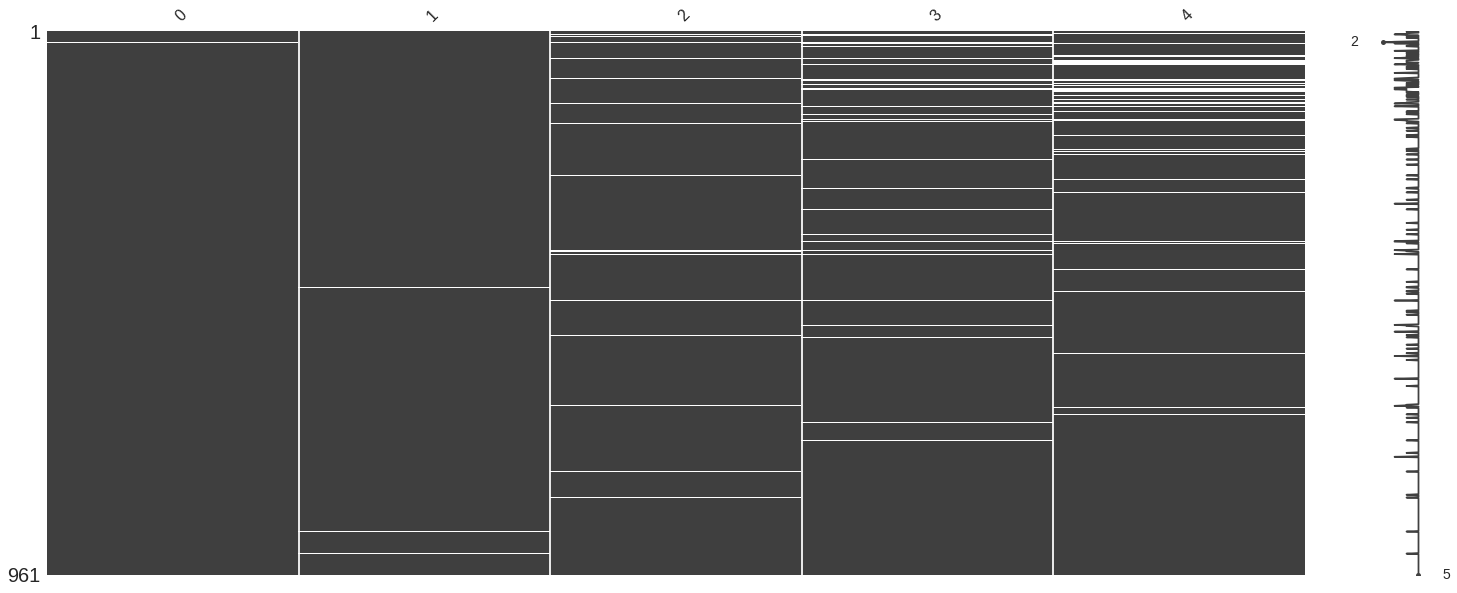

In [288]:
#---------------------------------------------------------------------------
# loading dataset Mamographic
#---------------------------------------------------------------------------

df = pd.read_csv("/home/owner/workspace/datasets/mammographic_masses2.csv", encoding='UTF-8')

X_full = np.array(df.iloc[:,:-1])
y_full = np.array(df.iloc[:,-1])  

#---------------------------------------------------------------------------
# Calling the Comparison Function based on the selected database 
#---------------------------------------------------------------------------
#get_ComparisonDecisionTree(True, X_full, y_full)
get_ComparisonDecisionTree(df)


